### Problem Statement

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

### Features

Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

### Importing all the required libraries

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

### Loading the Dataset

In [103]:
#Loading the training data set
df_train=pd.read_excel('Data_train.xlsx')
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [104]:
#Printing first five records
df_train.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [105]:
df_train.shape

(10683, 11)

Dataset has 10683 rows and 11 columns

In [106]:
df_train.size

117513

Dataset has 117513 number of elements

In [107]:
#Loading the test set
df_test=pd.read_excel('Test_set.xlsx')
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [108]:
#Printing last five records
df_test.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info


In [109]:
df_test.shape

(2671, 10)

Dataset has 2671 number of rows and 10 columns

In [110]:
df_test.size

26710

Test set has 26710 number of elments

In [111]:
#Checking the datatypes of training dataset

In [112]:
df_train.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

We can see that all the columns are categorical except the target variable Price which is integer. 

In [113]:
#Checking the datatypes of testing dataset
df_test.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object

### Checking for missing values 

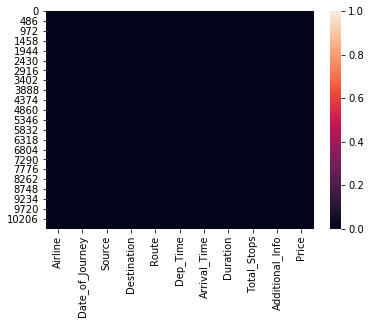

In [114]:
sn.heatmap(df_train.isnull())

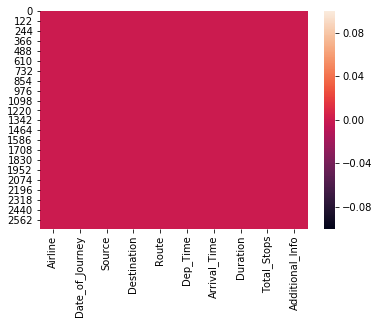

In [115]:
sn.heatmap(df_test.isnull())

The above both graph is here to show that if there are any null values in the above dataset.
In order to get clearity we have taken out the sum of the total null values down which is not giving us the same output that is 0.

In [116]:
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

There are two missing values in Route and Total_Stops features. 

In [117]:
df_test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

We can see that there are no missing values in the testing dataset.

In [118]:
df_train[df_train['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


It is observed that the 9039th records contais missing value

In [119]:
#Handling missing values by replacing the data with most frequent column values
df_train["Route"] = df_train["Route"].fillna(df_train["Route"].mode().values[0] )
df_train["Total_Stops"] = df_train["Total_Stops"].fillna(df_train["Total_Stops"].mode().values[0] )

In [120]:
# Checking again if there are missing values present or not
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

Now there are no null values present in the dataset

In [121]:
#Shows all the columns
df_train.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [122]:
#Checking for unique values present in each column
df_train.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

In [123]:
#Gives statistical summary of data
df_train.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


The above plot shows that the count of all column is equal to 10683 ,average price of ticket is 9087.06 and the minimum flight price is 1759 and maximum is 79512

### Feature engineering

In [124]:
df_train.keys()

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [125]:
df_train['Date_of_Journey'].head()

0    24/03/2019
1     1/05/2019
2     9/06/2019
3    12/05/2019
4    01/03/2019
Name: Date_of_Journey, dtype: object

In [126]:
# Extracintg Year, Month and Day from Date of Journey column:
df_train['Day_of_Journey'] = pd.DatetimeIndex(df_train['Date_of_Journey']).day
df_train['Month_of_Journey']=pd.DatetimeIndex(df_train['Date_of_Journey']).month
df_train['Year_of_Journey']=pd.DatetimeIndex(df_train['Date_of_Journey']).year

In [127]:
# Extracting hour and minutes from Dep_Time

df_train['Dep_Hour'] = pd.DatetimeIndex(df_train['Dep_Time']).hour

In [128]:
df_train['Dep_Minute'] = pd.DatetimeIndex(df_train['Dep_Time']).minute

In [129]:
#Similar to Dep Time ,extracting hour and minutes from Arrival_Time
df_train['Arrival_Hour'] = pd.DatetimeIndex(df_train['Arrival_Time']).hour
df_train['Arrival_Minute'] = pd.DatetimeIndex(df_train['Arrival_Time']).minute

In [130]:
#Extracting total duration in seconds
import re
def convert_into_seconds(X):
    a = [int(s) for s in re.findall(r'-?\d+\.?\d*', X)]
    if len(a) == 2:
        hr = a[0] * 3600
        min = a[1] * 60
    else:
        hr = a[0] * 3600
        min = 0   
    total = hr + min
    return total

df_train['Duration(sec)'] = df_train['Duration'].map(convert_into_seconds)

In [131]:
df_train.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration(sec)
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,10200
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,26700
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9,2019,9,25,4,25,68400


### Dropping the duplicate rows

In [132]:
df_train.shape

(10683, 19)

In [133]:
df_train= df_train.drop_duplicates()
df_train.shape

(10463, 19)

It shows that there were 220 duplicates rows

In [134]:
df_train['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

No info and No Info interprets the same meaning so replacing it with single name.

In [135]:
df_train['Additional_Info'].replace('No Info', 'No info', inplace = True)

### Exploratoy Data Analysis(EDA)

In [136]:
df_train['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [137]:
df_train['Airline'].value_counts()

Jet Airways                          3700
IndiGo                               2043
Air India                            1695
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

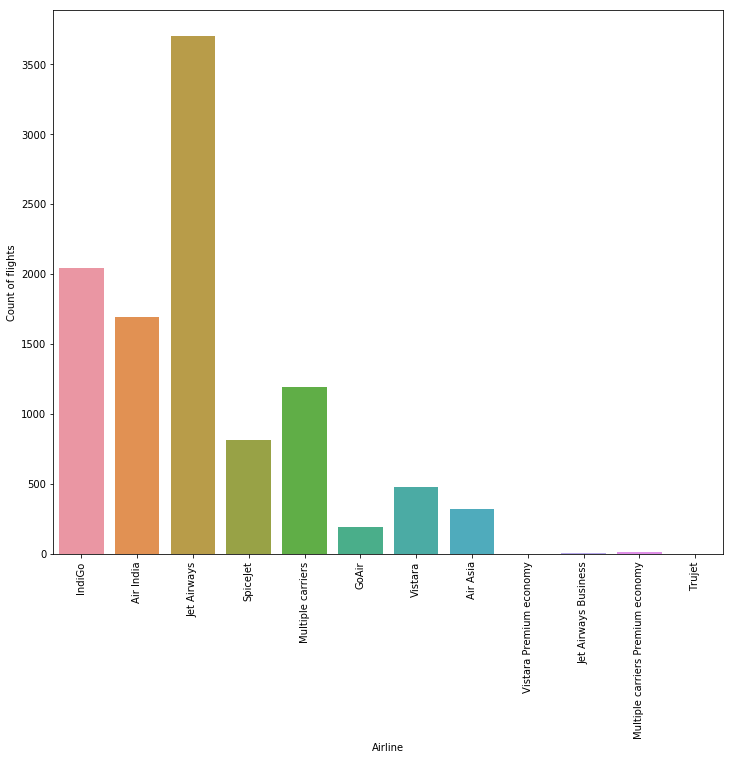

In [138]:
plt.figure(figsize = (12, 10))
sn.countplot(df_train['Airline'])
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation =90)

It is oserved that the Jet Airways has highest number of flights followed by Indigo and least count of flight airlines are Truejet and Vistara Premium economy.

In [139]:
df_train['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [140]:
df_train['Source'].value_counts()

Delhi       4346
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
Name: Source, dtype: int64

Text(0, 0.5, 'Count of flights')

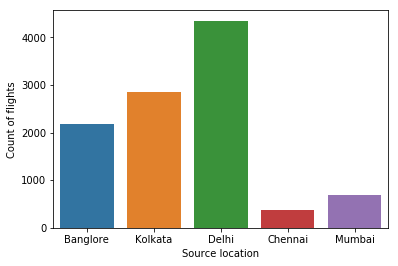

In [141]:
sn.countplot(df_train['Source'])
plt.xlabel('Source location')
plt.ylabel('Count of flights')

Delhi as source location have highest number of flight and lease number of flights are from Chennai 

In [142]:
df_train['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [143]:
df_train['Destination'].value_counts()

Cochin       4346
Banglore     2860
Delhi        1265
New Delhi     914
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

Text(0, 0.5, 'Count of flights')

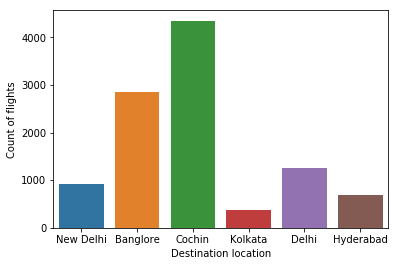

In [144]:
sn.countplot(df_train['Destination'])
plt.xlabel('Destination location')
plt.ylabel('Count of flights')

Cochin and Banglore city are among the top city for highest number of flight as destination location.

In [145]:
pd.crosstab(df_train['Source'],df_train['Destination'])

Destination,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
Source,,,,,,
Banglore,0,0,1265,0,0,914
Chennai,0,0,0,0,381,0
Delhi,0,4346,0,0,0,0
Kolkata,2860,0,0,0,0,0
Mumbai,0,0,0,697,0,0


Highest number of flights(4346) are from Delhi to Cochin

In [146]:
df_train['Month_of_Journey'].value_counts()

6     2466
3     2169
5     2025
9     1375
1     1058
12     946
4      424
Name: Month_of_Journey, dtype: int64

Text(0, 0.5, 'Count of flights')

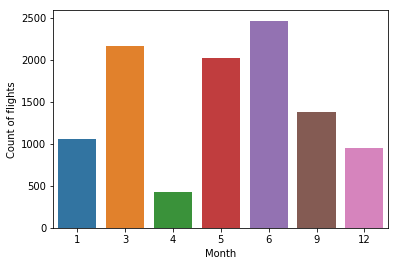

In [147]:
# Month wise flight distribution
sn.countplot(df_train['Month_of_Journey'])
plt.xlabel('Month')
plt.ylabel('Count of flights')

In the month of June there are most number of the flights  followed by march and may but in the month of April we see that minimum amount of flights are running that may be because of the not much passenger travel in the month of the April and this is the time we could find more discounts on the flights.

In [148]:
df_train['Day_of_Journey'].value_counts()

6     2114
5     1371
3     1344
27    1092
21    1085
24    1022
15     967
18     814
4      654
Name: Day_of_Journey, dtype: int64

Text(0, 0.5, 'Count of flights')

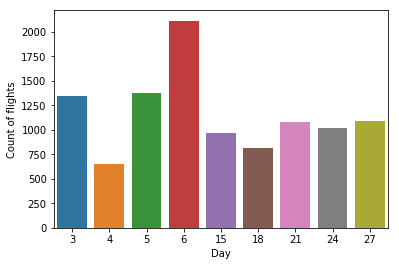

In [149]:
sn.countplot(df_train['Day_of_Journey'])
plt.xlabel('Day')
plt.ylabel('Count of flights')

On 6th of every month we can say that there are more number of flight running as comapared to other days.

In [150]:
df_train['Year_of_Journey'].value_counts()

2019    10463
Name: Year_of_Journey, dtype: int64

It shows that the data only for the year 2019

In [151]:
df_train['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [152]:
df_train['Total_Stops'].value_counts()

1 stop      5626
non-stop    3475
2 stops     1318
3 stops       43
4 stops        1
Name: Total_Stops, dtype: int64

Text(0, 0.5, 'Count of flights')

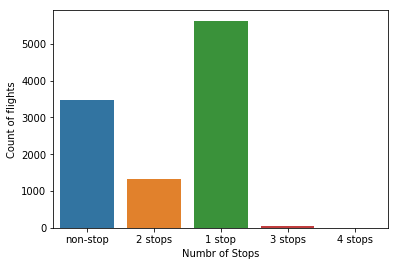

In [153]:
#Number of stops
sn.countplot(df_train['Total_Stops'])
plt.xlabel('Numbr of Stops')
plt.ylabel('Count of flights')

There are more number of flights which have one stop and there is only one flight which have 4 stops.

In [154]:
Departure_time=[]
for i in df_train['Dep_Hour']: # Scanning through all the values in Departure Hour
    if (i>=0 and i<6):
        Departure_time.append('Midnight')
    elif (i>=6 and i<12):
         Departure_time.append('Morning')
    elif (i>=12 and i<18):
         Departure_time.append('Afternoon')
    elif (i>=18 and i<24):
        Departure_time.append('Night')

In [155]:
# Storing list in dataframe for visualization purpose
Dep_time = pd.DataFrame(Departure_time)

In [156]:
Dep_time[0].value_counts()

Morning      4225
Night        2629
Afternoon    2563
Midnight     1046
Name: 0, dtype: int64

Text(0, 0.5, 'Count of flights')

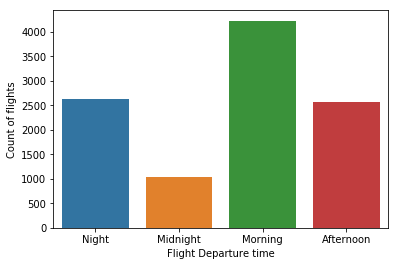

In [157]:
sn.countplot(Dep_time[0])
plt.xlabel('Flight Departure time')
plt.ylabel('Count of flights')

We can see that the least number of flight are in Midnight and Highest in Mornings.

In [158]:
Arrival_time=[]
for i in df_train['Arrival_Hour']: # Scanning through all the values in Arrival Hour
    if (i>=0 and i<6):
        Arrival_time.append('Midnight')
    elif (i>=6 and i<12):
         Arrival_time.append('Morning')
    elif (i>=12 and i<18):
         Arrival_time.append('Afternoon')
    elif (i>=18 and i<24):
        Arrival_time.append('Night')

In [159]:
# Storing list in dataframe for visualization purpose
Arrival_Time = pd.DataFrame(Arrival_time)

In [160]:
Arrival_Time[0].value_counts()

Night        4268
Afternoon    2201
Morning      2194
Midnight     1800
Name: 0, dtype: int64

Text(0, 0.5, 'Count of flights')

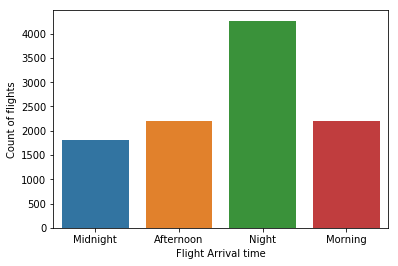

In [161]:
sn.countplot(Arrival_Time[0])
plt.xlabel('Flight Arrival time')
plt.ylabel('Count of flights')

Most number of flights are arrived at Night time.

In [162]:
df_train['Additional_Info'].value_counts()

No info                         8186
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
Red-eye flight                     1
2 Long layover                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

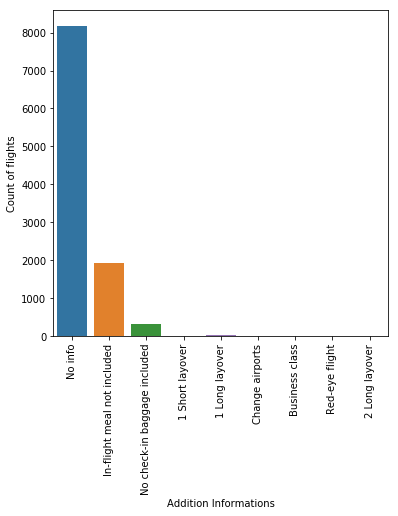

In [163]:
# Addition Info 
plt.figure(figsize = (6, 6))
sn.countplot(df_train['Additional_Info'])
plt.xlabel('Addition Informations')
plt.ylabel('Count of flights')
plt.xticks(rotation = 90)

It can be observed that the there is no additional information for more than 8000 flights.

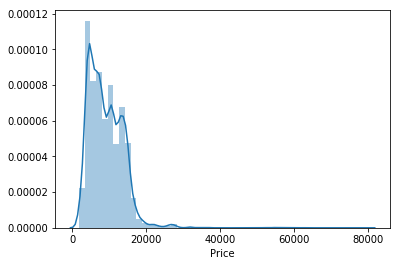

In [164]:
#Plotting the distribution plot
sn.distplot(df_train['Price'])

We can see that distribution plot is right skewed distribution. 

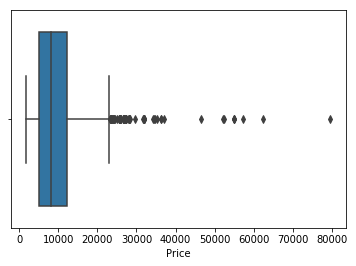

In [165]:
sn.boxplot(df_train['Price'])

Outliers are present in the dataset, but as we know that it is the price of the flights which changes on the realtime, thus we will not remove the outliers here.

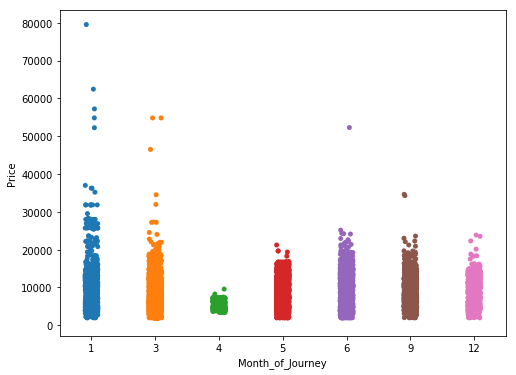

In [166]:
plt.figure(figsize=(8,6))
sn.stripplot(x='Month_of_Journey',y='Price',data=df_train)

Average Price is highest in first month and third month of year 2019.

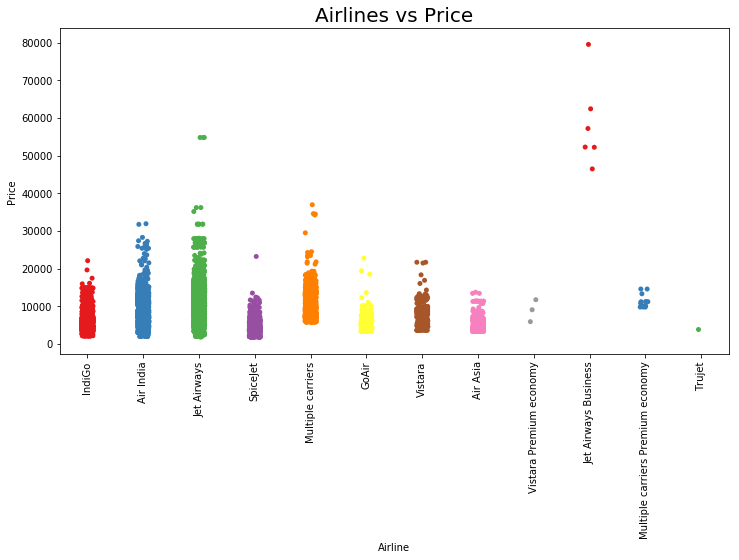

In [167]:
plt.figure(figsize=(12,6))
sn.stripplot(data=df_train,x='Airline',y='Price', palette='Set1')
plt.title('Airlines vs Price', size=20)
plt.xticks(rotation=90)
plt.show()

Jet Airways Business airline shows the highest price of flight

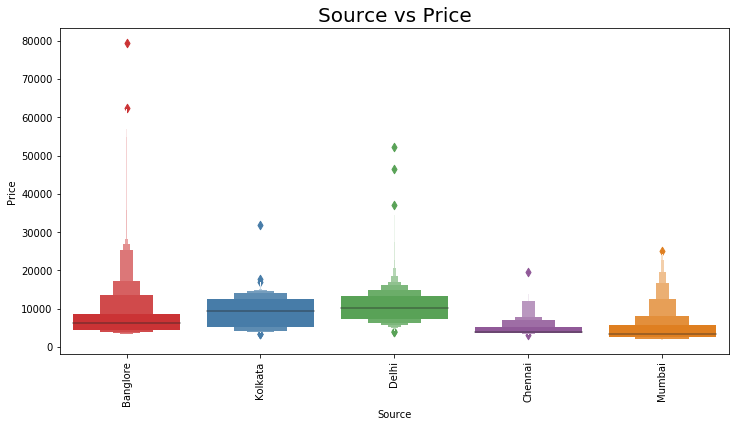

In [168]:
plt.figure(figsize=(12,6))
sn.boxenplot(df_train['Source'], df_train['Price'], palette='Set1')
plt.title('Source vs Price', size=20)
plt.xticks(rotation=90)
plt.show()

Banglore location have highest price followed by Delhi.

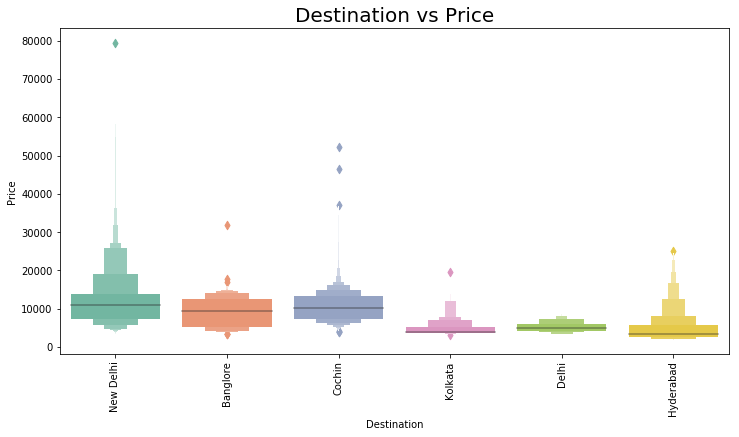

In [169]:
plt.figure(figsize=(12,6))
sn.boxenplot(df_train['Destination'], df_train['Price'], palette='Set2')
plt.title('Destination vs Price', size=20)
plt.xticks(rotation=90)
plt.show()

Delhi and Cochin Destination location have highest flight price. 

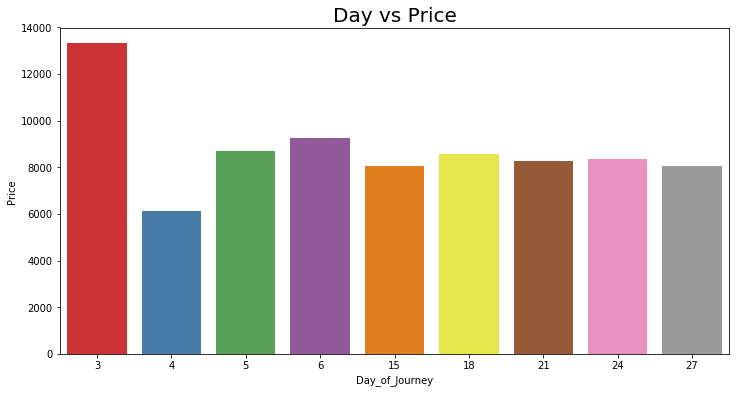

In [170]:
plt.figure(figsize=(12,6))
sn.barplot(x='Day_of_Journey', y='Price', data=df_train,palette='Set1',ci=None)
plt.title('Day vs Price', size=20)
plt.show()

Average price is highest on day third of month.

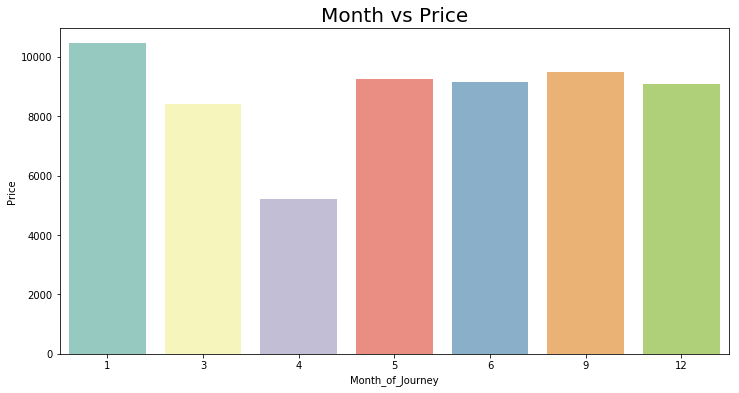

In [171]:
plt.figure(figsize=(12,6))
sn.barplot(x='Month_of_Journey', y='Price', data=df_train,palette='Set3',ci=None)
plt.title('Month vs Price', size=20)
plt.show()

It can be observed that the during the first month the flight price has reach highest value.

Text(0, 0.5, 'Price of ticket')

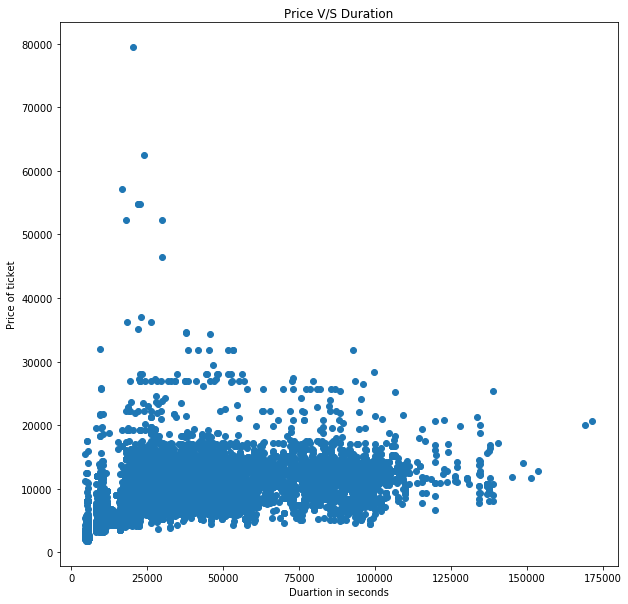

In [172]:
plt.figure(figsize = (10, 10))
plt.title('Price V/S Duration')
plt.scatter(df_train['Duration(sec)'], df_train['Price'])
plt.xlabel('Duartion in seconds')
plt.ylabel('Price of ticket')

The above graph shows that relationship between price of the flight tiket and duration of the flight. we could see that how the price changes as there is any change in the duration of the flight.

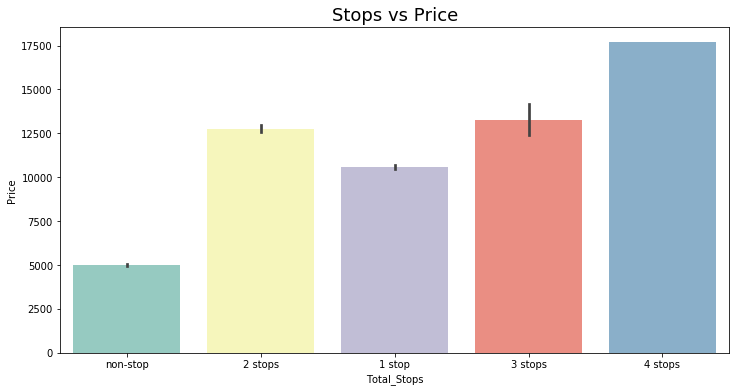

In [173]:
plt.figure(figsize=(12,6))
sn.barplot(df_train['Total_Stops'], df_train['Price'], palette='Set3')
plt.title('Stops vs Price', size=18)
plt.show()

One thing can be notice here is that, whichever flight has highest number of stop the price of flight is maximum for that and non stop flight has lowest price.

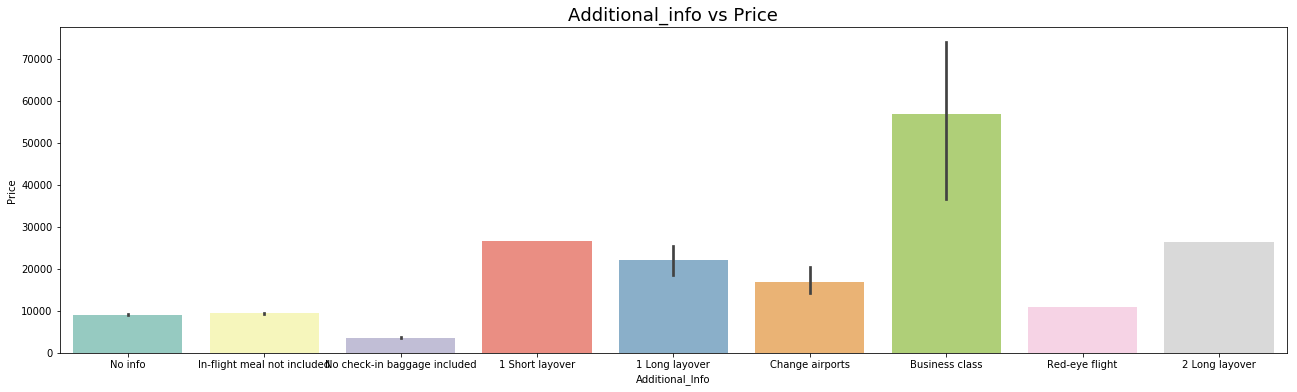

In [174]:
plt.figure(figsize=(22,6))
sn.barplot(df_train['Additional_Info'], df_train['Price'], palette='Set3')
plt.title('Additional_info vs Price', size=18)
plt.show()

Business class shows highest flight price and whichever flight says the in flight meal not included the price is below 10000 for all the flights

In [175]:
df_train.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration(sec)
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,10200


### Label Encoding

In [176]:
#Removing al the columns which are of no use in order to predict the price of the flights because new columns are created for same
df_train.drop(['Date_of_Journey','Route', 'Dep_Time', 'Arrival_Time', 'Duration'], axis = 1, inplace = True)

In [177]:
#year of journey is same ,so removing the column
df_train.drop(['Year_of_Journey'],axis=1,inplace=True)

In [178]:
df_train.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration(sec)
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,3,22,20,1,10,10200
1,Air India,Kolkata,Banglore,2 stops,No info,7662,5,1,5,50,13,15,26700
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,6,9,9,25,4,25,68400
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,5,12,18,5,23,30,19500
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,3,1,16,50,21,35,17100


In [179]:
df_train.select_dtypes(['object']).columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info'], dtype='object')

In [180]:
# Using lable encoding 
from sklearn.preprocessing import LabelEncoder

In [181]:
for col in df_train.columns:
    if df_train[col].dtypes == 'object':
        encoder = LabelEncoder()
        df_train[col] = encoder.fit_transform(df_train[col])

In [182]:
df_train.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration(sec)
0,3,0,5,4,7,3897,24,3,22,20,1,10,10200
1,1,3,0,1,7,7662,5,1,5,50,13,15,26700
2,4,2,1,1,7,13882,6,9,9,25,4,25,68400
3,3,3,0,0,7,6218,5,12,18,5,23,30,19500
4,3,0,5,0,7,13302,3,1,16,50,21,35,17100


In [183]:
df_train.dtypes

Airline             int32
Source              int32
Destination         int32
Total_Stops         int32
Additional_Info     int32
Price               int64
Day_of_Journey      int64
Month_of_Journey    int64
Dep_Hour            int64
Dep_Minute          int64
Arrival_Hour        int64
Arrival_Minute      int64
Duration(sec)       int64
dtype: object

### Repeating same steps for test set as peformed for training set

In [184]:
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


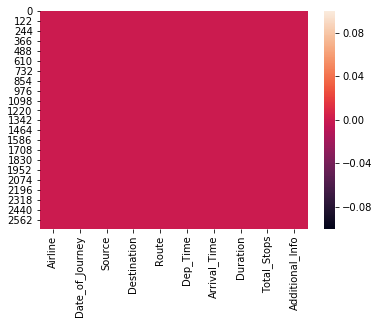

In [185]:
#Plotting heatmap
sn.heatmap(df_test.isnull())

In [186]:
df_test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

There are no missing values in the testing dataset.

In [187]:
df_test.shape

(2671, 10)

In [188]:
# Extracintg Year, Month and Day from Date of Journey column:
df_test['Day_of_Journey'] = pd.DatetimeIndex(df_test['Date_of_Journey']).day
df_test['Month_of_Journey']=pd.DatetimeIndex(df_test['Date_of_Journey']).month
df_test['Year_of_Journey']=pd.DatetimeIndex(df_test['Date_of_Journey']).year

# Extracting hour and minutes from Dep_Time

df_test['Dep_Hour'] = pd.DatetimeIndex(df_test['Dep_Time']).hour
df_test['Dep_Minute'] = pd.DatetimeIndex(df_test['Dep_Time']).minute

#Similar to Dep Time ,extracting hour and minutes from Arrival_Time
df_test['Arrival_Hour'] = pd.DatetimeIndex(df_test['Arrival_Time']).hour
df_test['Arrival_Minute'] = pd.DatetimeIndex(df_test['Arrival_Time']).minute

#Extracting total duration in seconds
import re
def convert_into_seconds(X):
    a = [int(s) for s in re.findall(r'-?\d+\.?\d*', X)]
    if len(a) == 2:
        hr = a[0] * 3600
        min = a[1] * 60
    else:
        hr = a[0] * 3600
        min = 0   
    total = hr + min
    return total

df_test['Duration(sec)'] = df_test['Duration'].map(convert_into_seconds)

df_test['Additional_Info'].replace('No Info', 'No info', inplace = True)

Departure_time=[]
for i in df_test['Dep_Hour']: # Scanning through all the values in Departure Hour
    if (i>=0 and i<6):
        Departure_time.append('Midnight')
    elif (i>=6 and i<12):
         Departure_time.append('Morning')
    elif (i>=12 and i<18):
         Departure_time.append('Afternoon')
    elif (i>=18 and i<24):
        Departure_time.append('Night')

# Storing list in dataframe for visualization purpose
Dep_time = pd.DataFrame(Departure_time)

Arrival_time=[]
for i in df_test['Arrival_Hour']: # Scanning through all the values in Arrival Hour
    if (i>=0 and i<6):
        Arrival_time.append('Midnight')
    elif (i>=6 and i<12):
         Arrival_time.append('Morning')
    elif (i>=12 and i<18):
         Arrival_time.append('Afternoon')
    elif (i>=18 and i<24):
        Arrival_time.append('Night')

# Storing list in dataframe for visualization purpose
Arrival_Time = pd.DataFrame(Arrival_time)



In [189]:
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Day_of_Journey,Month_of_Journey,Year_of_Journey,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration(sec)
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6,2019,17,30,4,25,39300
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,5,12,2019,6,20,10,20,14400
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5,2019,19,15,19,0,85500
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,5,2019,8,0,21,0,46800
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6,2019,23,55,2,45,10200


In [190]:
#Removing al the columns which are of no use in order to predict the price of the flights because new columns are created for same
df_test.drop(['Date_of_Journey','Route', 'Dep_Time', 'Arrival_Time', 'Duration'], axis = 1, inplace = True)
#year of journey is same ,so removing the column
df_test.drop(['Year_of_Journey'],axis=1,inplace=True)

#Using label encoding
from sklearn.preprocessing import LabelEncoder
for col in df_test.columns:
    if df_test[col].dtypes == 'object':
        encoder = LabelEncoder()
        df_test[col] = encoder.fit_transform(df_test[col])
df_test.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Day_of_Journey,Month_of_Journey,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration(sec)
0,4,2,1,0,5,6,6,17,30,4,25,39300
1,3,3,0,0,5,5,12,6,20,10,20,14400
2,4,2,1,0,3,21,5,19,15,19,0,85500
3,6,2,1,0,5,21,5,8,0,21,0,46800
4,0,0,2,4,5,24,6,23,55,2,45,10200


### Checking for Skewness

In [191]:
df_train.skew()

Airline             0.723606
Source             -0.419701
Destination         1.225206
Total_Stops         0.617258
Additional_Info    -2.138798
Price               1.857641
Day_of_Journey      0.376154
Month_of_Journey    0.630865
Dep_Hour            0.108458
Dep_Minute          0.171091
Arrival_Hour       -0.378815
Arrival_Minute      0.110803
Duration(sec)       0.903752
dtype: float64

#### Normale Skewness range is -0.5 to 0.5 so some of the columns are out of range

In [192]:
skewed_columns=['Airlines','Destination','Total_Stops','Addition_Info','Price','Month_of_Journey','Duration']

In [193]:
# Using log transformation 
for col in df_train.columns:
    if (df_train.skew().loc[col]>0.55 or df_train.skew().loc[col]<-.55) :
        df_train[col]=np.log1p(df_train[col])

In [194]:
df_train.skew()

Airline            -0.682882
Source             -0.419701
Destination         0.276452
Total_Stops         0.471561
Additional_Info    -5.923793
Price              -0.228083
Day_of_Journey      0.376154
Month_of_Journey   -0.526486
Dep_Hour            0.108458
Dep_Minute          0.171091
Arrival_Hour       -0.378815
Arrival_Minute      0.110803
Duration(sec)      -0.142459
dtype: float64

####  Finds correlation between Independent and dependent features

In [195]:
#Finding the correlation values
cor=df_train.corr()
cor

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration(sec)
Airline,1.000000,-0.007182,0.030548,-0.065535,-0.129388,0.013740,0.030859,0.002487,-0.032426,-0.082652,-0.016443,-0.109376,-0.085029
Source,-0.007182,1.000000,-0.626155,-0.214996,0.010126,0.015451,0.007829,0.062981,0.060215,-0.056602,0.028254,0.021392,0.119881
Destination,0.030548,-0.626155,1.000000,0.337658,-0.000913,-0.190392,-0.014978,-0.096177,-0.107228,0.105160,-0.055512,-0.015650,-0.348681
Total_Stops,-0.065535,-0.214996,0.337658,1.000000,0.144165,-0.639795,0.045100,-0.041970,0.033370,0.055939,-0.103768,0.180882,-0.759714
Additional_Info,-0.129388,0.010126,-0.000913,0.144165,1.000000,-0.098982,-0.000285,0.039111,-0.047691,-0.028900,0.021102,0.032514,-0.149564
Price,0.013740,0.015451,-0.190392,-0.639795,-0.098982,1.000000,-0.151300,0.023595,-0.007481,-0.052572,0.066531,-0.108675,0.723277
Day_of_Journey,0.030859,0.007829,-0.014978,0.045100,-0.000285,-0.151300,1.000000,-0.099187,-0.007566,-0.013602,-0.001080,-0.019623,-0.051242
Month_of_Journey,0.002487,0.062981,-0.096177,-0.041970,0.039111,0.023595,-0.099187,1.000000,0.020200,-0.006946,-0.005356,-0.030461,0.058425
Dep_Hour,-0.032426,0.060215,-0.107228,0.033370,-0.047691,-0.007481,-0.007566,0.020200,1.000000,-0.015131,-0.003789,0.072987,-0.017447
Dep_Minute,-0.082652,-0.056602,0.105160,0.055939,-0.028900,-0.052572,-0.013602,-0.006946,-0.015131,1.000000,0.046494,-0.021350,-0.035018


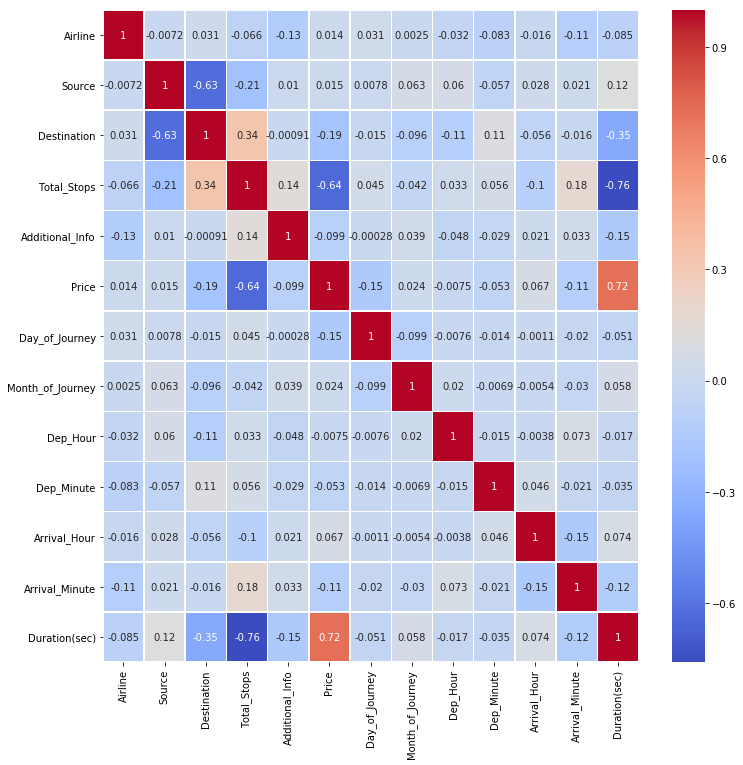

In [196]:
#Plotting heatmap
corr_matrix=df_train.corr()
fig, axis = plt.subplots(figsize=(12, 12))
sn.heatmap(corr_matrix,annot=True,linewidths=.5,cmap='coolwarm')

- Price is having good positive correlation with the Duration(sec).
- Total_stops and Duration(sec) are negatively correlated with each other.
- Source and Destination are negatively correlated with each other.
- Total_stops and Destination shows somewhat good correlation with each other.

### Seperating the data into independent and dependent variables

In [197]:
x = df_train.drop('Price', axis = 1) #Set of input features 
y = df_train['Price']  #Target variable

In [198]:
print(x.shape)
x.head()

(10463, 12)


,Airline,Source,Destination,Total_Stops,Additional_Info,Day_of_Journey,Month_of_Journey,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration(sec)
0,1.386294,0,1.791759,1.609438,2.079442,24,1.386294,22,20,1,10,9.230241
1,0.693147,3,0.000000,0.693147,2.079442,5,0.693147,5,50,13,15,10.192456
2,1.609438,2,0.693147,0.693147,2.079442,6,2.302585,9,25,4,25,11.133143
3,1.386294,3,0.000000,0.000000,2.079442,5,2.564949,18,5,23,30,9.878221
4,1.386294,0,1.791759,0.000000,2.079442,3,0.693147,16,50,21,35,9.746892


In [199]:
print(y.shape)
y.head()

(10463,)


0    8.268219
1    8.944159
2    9.538420
3    8.735364
4    9.495745
Name: Price, dtype: float64

### Using Standard Scaler

In [200]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [201]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
MaxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=i)
    mod=LinearRegression()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>MaxAccu:
        MaxAccu=acc
        maxRS=i
print("Best R2_score is",MaxAccu,'on random state',maxRS)

Best R2_score is 0.5937777895286455 on random state 47


### Creating train test split

In [202]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=maxRS)

### Applying Different models on the dataset

In [203]:
#Linear Regression
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)
y_pred=regressor.predict(x_test)
lr_score=r2_score(y_test,y_pred)
print("R2 score from Linear regression is",lr_score)
lr_cv=cross_val_score(regressor,x,y,scoring='r2',cv=5).mean()
lr_mae=mean_absolute_error(y_test,y_pred)
print('Mean absolute error : ',lr_mae)
lr_mse=mean_squared_error(y_test,y_pred)
print('Mean Squared error :',lr_mse)
print("Cross validation score is ",lr_cv)

R2 score from Linear regression is 0.5937777895286455
Mean absolute error :  0.2671891754817132
Mean Squared error : 0.108183457431179
Cross validation score is  0.5680737752294738


In [204]:
# Support Vector Regression
from sklearn.svm import SVR
SR = SVR()
SR.fit(x, y)
y_pred=SR.predict(x_test)
svr_score=r2_score(y_test,y_pred)
print("R2 score from Support Vector regression is",svr_score)
svr_cv=cross_val_score(SR,x,y,scoring='r2',cv=5).mean()
svr_mae=mean_absolute_error(y_test,y_pred)
print('Mean absolute error : ',svr_mae)
svr_mse=mean_squared_error(y_test,y_pred)
print('Mean Squared error :',svr_mse)
print("Cross validation score is ",svr_cv)

R2 score from Support Vector regression is 0.8631003647932083
Mean absolute error :  0.13687837876021883
Mean Squared error : 0.03645855759721504
Cross validation score is  0.8114496628450396


In [205]:
# K nearest neighbors
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor()
neigh.fit(x, y)
y_pred=neigh.predict(x_test)
knn_score=r2_score(y_test,y_pred)
print("R2 score from K Nearest Neighbors regression is",knn_score)
knn_cv=cross_val_score(neigh,x,y,scoring='r2',cv=5).mean()
knn_mae=mean_absolute_error(y_test,y_pred)
print('Mean absolute error : ',knn_mae)
knn_mse=mean_squared_error(y_test,y_pred)
print('Mean Squared error :',knn_mse)
print("Cross validation score is ",knn_cv)

R2 score from K Nearest Neighbors regression is 0.8965626403401219
Mean absolute error :  0.10915703134578694
Mean Squared error : 0.027547019604303682
Cross validation score is  0.8076724982891325


In [206]:
from sklearn.ensemble import RandomForestRegressor
RFR= RandomForestRegressor(n_estimators=10)
RFR.fit(x_train, y_train)
y_pred=RFR.predict(x_test)
rfr_score=r2_score(y_test,y_pred)
print("R2 score from Random Forest regression is",rfr_score)
rfr_cv=cross_val_score(RFR,x,y,scoring='r2',cv=5).mean()
rfr_mae=mean_absolute_error(y_test,y_pred)
print('Mean absolute error : ',rfr_mae)
rfr_mse=mean_squared_error(y_test,y_pred)
print('Mean Squared error :',rfr_mse)
print("Cross validation score is ",rfr_cv)

R2 score from Random Forest regression is 0.9293641165968395
Mean absolute error :  0.07963750912367028
Mean Squared error : 0.01881146300787608
Cross validation score is  0.9275569676082084


In [207]:
model=['Linear Regression','Support Vector Regressor','K Neighbors Regressor','Random Forest Regressor']

acc=[svr_score*100,lr_score*100,knn_score*100,rfr_score*100]
mae=[svr_mae,lr_mae,knn_mae,rfr_mae]
mse=[svr_mse,lr_mse,knn_mse,rfr_mse]
cv_score=[svr_cv*100,lr_cv*100,knn_cv*100,rfr_cv*100]

result=pd.DataFrame({'Model':model,'R2_score':acc,'Mean Absolute Error':mae,'Mean Squared Error':mse,'Cross validation_score':cv_score})
result
# Creting dataframe to store R2_score,Mae and cv score of all the models.

,Model,R2_score,Mean Absolute Error,Mean Squared Error,Cross validation_score
0,Linear Regression,86.310036,0.136878,0.036459,81.144966
1,Support Vector Regressor,59.377779,0.267189,0.108183,56.807378
2,K Neighbors Regressor,89.656264,0.109157,0.027547,80.767250
3,Random Forest Regressor,92.936412,0.079638,0.018811,92.755697


### Choosing the model

- Random forest Regressor model works well in comparision of all giving max r2_score of 92.77 and least cross validation of  difference of 0.10.

### Applying hyperparamter to the best accuracy model

In [208]:
from sklearn.model_selection import GridSearchCV

In [209]:
parameters = { 
            "n_estimators"      : [10,50,100,200],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }

In [210]:
GCV=GridSearchCV(RandomForestRegressor(),parameters,cv=5)

In [211]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 4, 8],
                         'n_estimators': [10, 50, 100, 200]})

In [212]:
GCV.best_params_

{'bootstrap': True,
 'max_features': 'auto',
 'min_samples_split': 4,
 'n_estimators': 200}

In [213]:
Final_Model=RandomForestRegressor(bootstrap=True,max_features='auto',min_samples_split=4,n_estimators=200)
Final_Model.fit(x_train,y_train)
y_pred=Final_Model.predict(x_test)
acc=r2_score(y_test,y_pred)
print("R2 Score of the model is ",acc*100)
knn_mae=mean_absolute_error(y_test,y_pred)
print('Mean absolute error : ',knn_mae)

R2 Score of the model is  93.5040930550919
Mean absolute error :  0.07774993649902585


### Conclusion

Here after trying with various model for the above dataset, I am going to choose Random forest regressor as the best model for pridicting the price of the flights.K neighbors regressor and linear regression models achieved accuracy of 89 and 86 but Randmon Forest Regressor performs best with hyperparameter tuning, where accuracy increased from 92.77 to 93.5%.

### Saving the Model

In [214]:
import joblib
import sys
sys.modules['sklearn.externals.joblib']=joblib
from sklearn.externals import joblib

In [215]:
joblib.dump(Final_Model,'Final_Model.pkl')

['Final_Model.pkl']